## **https://docs.google.com/presentation/d/1J-i3ZWCN_OGE4iDfzQCv23hdirZth_6oT2RGsKrEjrA/edit?usp=sharing**

# Import Packages

In [1]:
import math
import fileinput
import numpy as np
from scipy import integrate
from scipy import optimize
import random
import astropy
from astropy import units
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
#import winsound
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split #splitting data into training and test sets
from sklearn.preprocessing import StandardScaler #feature scaling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import clear_output

In [3]:
from sklearn.metrics import mean_absolute_error, r2_score, f1_score,accuracy_score
from sklearn.linear_model import LinearRegression
#from lightgbm import LGBMRegressor
#from xgboost.sklearn import XGBRegressor
#from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from matplotlib import gridspec
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from numpy import absolute, mean, std
from sklearn.metrics import auc

# Load Data

In [4]:
#keys_list = ['wav_rest','seds','gal_num','stellar_mass','dust_mass','metallicity','sfr']

z_dict = {0:305,1:212,2:160,3:127,4:104,5:87,6:74}
file_list = [305,212,160,127,104,87,74]
z_list = [0,1,2,3,4,5,6]
data_list = []
for f in file_list:
    data_filt = np.load('npzFiles/'+f'all_filter_snap{f}.npz')
    data_list.append(data_filt)

for key in data_filt.keys():
    print(key)

wav_filt
filters
gal_num
stellar_mass
dust_mass
metallicity
sfr


In [5]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=68, Om0=0.3, Tcmb0=2.725)
age0 = cosmo.age(0)

In [6]:
full_list = {}
full_list['filters'] = []
full_list['gal_num'] = []
full_list['stellar_mass'] = []
full_list['dust_mass'] = []
full_list['metallicity'] = []
full_list['sfr'] = []
full_list['z'] = []

for i in range(len(data_list)):
    dic = data_list[i]
    z = z_list[i]
    for j in range(len(dic['filters'])):
        full_list['filters'].append(dic['filters'][j])
        full_list['gal_num'].append(dic['gal_num'][j])
        full_list['stellar_mass'].append(dic['stellar_mass'][j])
        full_list['dust_mass'].append(dic['dust_mass'][j])
        full_list['metallicity'].append(dic['metallicity'][j])
        full_list['sfr'].append(dic['sfr'][j])
        full_list['z'].append(z)

full_list['filters'] = np.array(full_list['filters'])
full_list['stellar_mass'] = np.array(full_list['stellar_mass'])
full_list['dust_mass'] = np.array(full_list['dust_mass'])
full_list['metallicity'] = np.array(full_list['metallicity'])
full_list['sfr'] = np.array(full_list['sfr'])
full_list['z'] = np.array(full_list['z'])

np.savez('all_data.npz',full_list)

In [7]:
dic['filters']

array([[1.63656268e+17, 6.63749896e+16, 5.71501264e+16, ...,
        8.14227607e+13, 1.40851299e+13, 2.16371561e+12],
       [4.93598706e+17, 1.95074218e+17, 1.58259122e+17, ...,
        5.45556241e+13, 9.21385325e+12, 1.39403965e+12],
       [1.90273963e+17, 8.97418498e+16, 8.48556219e+16, ...,
        3.60739776e+13, 5.83695783e+12, 8.57672955e+11],
       ...,
       [1.61721632e+16, 7.15039744e+15, 5.69752395e+15, ...,
        4.22163330e+11, 8.46233351e+10, 1.43504642e+10],
       [1.44415514e+16, 6.55637176e+15, 5.58738675e+15, ...,
        3.51467036e+11, 7.10639811e+10, 1.21276269e+10],
       [2.34884114e+16, 1.05295294e+16, 7.91205285e+15, ...,
        1.70460646e+11, 3.29133095e+10, 5.43757388e+09]])

In [9]:
# testing that data was all stored correctly

In [8]:
stellar_masses = full_list['stellar_mass'] # solar masses
dust_masses = full_list['dust_mass'] # solar masses
sfrs = full_list['sfr'] # msun/yr
metal = full_list['metallicity'] # individual, not scaled bto sun
gal_nums = full_list['gal_num'] # number assigned by group code
z_gals = full_list['z']
filters = full_list['filters']*units.erg/units.s/units.cm**2/units.micron
wav_filt = data_filt['wav_filt'] # micron

In [9]:
np.shape(z_gals)

(12611,)

In [10]:
np.shape(sfrs)

(12611,)

In [11]:
np.shape(filters)

(12611, 35)

In [12]:
np.shape(wav_filt)

(35,)

In [13]:
z_gals

array([0, 0, 0, ..., 6, 6, 6])

[1.38573142e+10 1.38573142e+10 1.38573142e+10 ... 9.41141504e+08
 9.41141504e+08 9.41141504e+08]


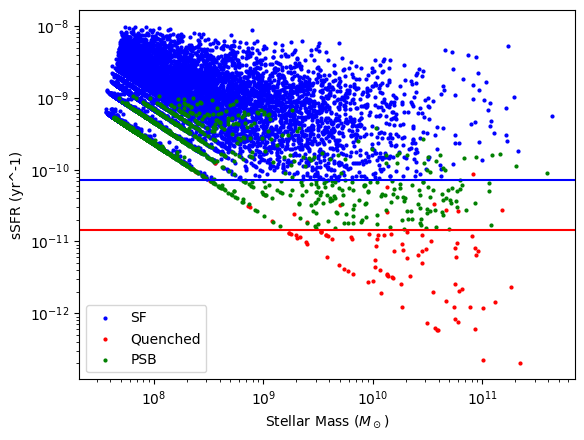

1418

In [14]:
ssfr = sfrs/stellar_masses
tH = age0.to('yr').value

age_arr = cosmo.age(z_gals).to('yr').value
print(age_arr)
cut1 = ssfr > 1/age_arr
cut2 = ssfr < 0.2/age_arr
plt.scatter(stellar_masses[cut1],ssfr[cut1],label = 'SF',color = 'blue',s=4)
plt.scatter(stellar_masses[cut2],ssfr[cut2],label = 'Quenched',color = 'red',s = 4)
plt.scatter(stellar_masses[~(cut1 | cut2)],ssfr[~(cut1 | cut2)],
            label = 'PSB',color = 'green', s = 4)

plt.axhline(1/tH,color = 'blue')
plt.axhline(0.2/tH,color = 'red')
plt.xlabel('Stellar Mass $(M_\\odot)$')
plt.ylabel('sSFR (yr^-1)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
plt.close()
len(ssfr[~(cut1 | cut2)])

# Setup ML Model

In [15]:
binwidth = 100 #Myr
def get_galaxy_SFH_fit_style(massform,tform,nbins = 10):
    t_H = tH*10**-6
    tbinmax = (t_H * 0.8) #* 1e9 #earliest time bin goes from age = 0 to age = 2.8 Gyr
    lim1, lim2 = 8.0-6,8.477-6#7.47, 8.0 #most recent time bins at 100 Myr and 300 Myr ago
    agelims = [0,lim1]
    agelims += np.linspace(lim2,np.log10(tbinmax),nbins-2).tolist()
    agelims += [np.log10(t_H)]#*1e9)]
      #print(agelims)
    agebins = np.array([agelims[:-1], agelims[1:]])
    #print(agebins)
    #print(10**agebins)
    #binsl =(t_H-10**np.array(agelims))[::-1]
    binsl = np.arange(0, t_H, 250)
    #print(tH, agelims, binsl, '\n')
    #print(binsl)
    msums, binsedge, binnumber = scipy.stats.binned_statistic(tform, massform,
                                                              statistic='sum',bins=binsl)
    msums[np.isnan(msums)] = 0
    timediff = np.diff(binsedge)
    sfr_fit = msums/timediff/10**6
    sfr_plot = []
    time_plot = []
    for i in range(len(sfr_fit)):
        time_plot.append(binsedge[i])
        time_plot.append(binsedge[i+1])
        sfr_plot.append(sfr_fit[i])
        sfr_plot.append(sfr_fit[i])
    return time_plot,sfr_plot,sfr_fit


#this function is given to scipy.stats.binned_statistics
#and acts on the particle masses per bin to give total(Msun) / timebin
def get_massform(massform):
        return np.sum(massform) / (binwidth * 1e6)
def get_galaxy_SFH(file_,galaxy_id,galz):
    dat = pd.read_pickle(file_)
    massform = np.array(dat['massform'][np.where(np.asarray(dat['id'])==galaxy_id)[0][0]])
    tform =  np.array(dat['tform'][np.where(np.asarray(dat['id'])==galaxy_id)[0][0]])*1000
    age_univ = cosmo.age(galz).to('Myr').value
    t0 = cosmo.age(0).to('Myr').value

    tform = tform+(t0-age_univ)


    #convert from Gyr to Myr
    t_H = np.max(tform)
    #bins = np.arange(np.min(tform), np.max(tform), binwidth) #can use whatever bin size/start/end that fit your problem
    bins = np.arange(0, t_H, binwidth) #can use whatever bin size/start/end that fit your problem
    #print(bins)
    sfrs, bins, binnumber = scipy.stats.binned_statistic(tform, massform,
                                                         statistic=get_massform, bins=bins)
    sfrs[np.isnan(sfrs)] = 0
    bincenters = 0.5*(bins[:-1]+bins[1:])
    sfh = sfrs
   # get_galaxy_SFH_fit_style(massform,tform)
    # x,y,z = get_galaxy_SFH_fit_style(massform,tform,nbins = 10)
    x,y,z = get_galaxy_SFH_fit_style(massform,tform)
    return bincenters, sfh, x, y, z

def arr_double(arr):
    #print(np.shape(arr))
    new_arr = []
    try:
        for val in arr[0]:
            new_arr.append(val)
            new_arr.append(val)
    except:
        for val in arr:
            new_arr.append(val)
            new_arr.append(val)
    return np.array(new_arr)

In [17]:
import scipy.stats
import pandas as pd


#path = paths[user]+'/snap305_sfhs.pickle'
paths = lambda x: f"/orange/narayanan/d.zimmerman/simba/m25n512/snap{x}/snap{x}_sfhs.pickle"
z_dict = {0:305,1:212,2:160,3:127,4:104,5:87,6:74}
plot_info = {}
sfh_to_fit = []

for i in range(len(gal_nums)):
    galaxy_id = gal_nums[i]
    gal_z = z_gals[i]
    time, sfh, time_prosp,sfh_prosp, sfr_fit = get_galaxy_SFH(paths(z_dict[gal_z]),galaxy_id,gal_z)
    plot_info[f'{gal_z}_{galaxy_id}'] = [time, np.log10(np.array(sfh)+1), time_prosp,np.log10(np.array(sfh_prosp)+1)]
    sfh_to_fit.append(np.log10(np.array(sfr_fit)+1))


In [18]:
combined_y = np.array(sfh_to_fit)
combined_X = np.array(filters)
print(np.shape(combined_y))
print(np.shape(combined_X))

(12611, 55)
(12611, 35)


# Split Data

In [24]:
train_X, test_X, train_y, test_y = train_test_split(combined_X, combined_y, random_state=117, test_size=0.3)
#train_X, test_X, train_y, test_y = train_test_split(combined_X, combined_y, random_state=117)
#-------------------------------------------
trainInds = []
for train in train_X:
    trainInds.append(gal_nums[np.where(combined_X==train)[0][0]])
testInds = []
for test in test_X:
    testInds.append(gal_nums[np.where(combined_X==test)[0][0]])
trainInds = np.sort(np.asarray(trainInds))
testInds = np.sort(np.asarray(testInds))
print('Training Set:', len(trainInds), trainInds[:10])
print('Testing Set:', len(testInds), testInds[:10])

Training Set: 8827 [0 0 0 1 1 1 1 1 1 1]
Testing Set: 3784 [0 2 3 3 3 4 4 4 6 7]


# Run Model

In [25]:
#model = LinearRegression()
#model = KNeighborsRegressor()
model = RandomForestRegressor(verbose=0, random_state=1)
#--------------------------------------
model.fit(train_X, train_y)
#[mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]
trainScore = model.score(train_X, train_y)
testScore = model.score(test_X, test_y)
#--------------------------------------
guess_sfh = model.predict(test_X)
#--------------------------------------
mseTest = mean_squared_error(test_y, guess_sfh)
mseTrain = mean_squared_error(train_y, model.predict(train_X))
print(f"Score: {trainScore*100:.1f}% (training), {testScore*100:.1f}% (testing)")
print(f"Mean Squared Error (MSE): {mseTrain:.1e} (training), {mseTest:.1e} (testing)")
#--------------------------------------
# define the evaluation procedure
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
#n_scores = cross_val_score(model, combined_X, combined_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
#n_scores = absolute(n_scores)
# summarize performance
#print('Mean Absolute Error (MAE): %.3f +/- %.3f' % (mean(n_scores), std(n_scores)))
#--------------------------------------

Score: 95.0% (training), 58.6% (testing)
Mean Squared Error (MSE): 4.1e-04 (training), 2.8e-03 (testing)


# Inspect Results

In [ ]:
# perm = np.random.permutation(len(gal_nums))
# for idx in range(10):
# #for idx in perm[:50]:
#     plt.figure(figsize=(7,3))
#     gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
#     gnum = gal_nums[idx]
#     fil = filters[idx]
#     wav = wav_filt
#     res = plot_info[gnum]
#     #print(gnum)
#     #print(ssfr[idx]*tH)
#     x = np.asarray(res[0])*1e6
#     y = np.asarray(res[1])
#     a1 = auc(x,y) # auc = area under curve (integration)
#     ax = plt.subplot(gs[0])
#     plt.plot(res[0],res[1],label = f'binned true (int: {a1:.1e})')
#     x = np.asarray(res[2])*1e6
#     y = np.asarray(res[3])
#     a2 = auc(x,y) # auc = area under curve (integration)
#     plt.plot(res[2],y,label = f'binned nonpara (int: {a2:.1e})')
#     #pred = model.predict(filters[idx])
#     pred = model.predict(filters[idx].reshape(1, -1))
#     #pred = model.predict(filters[idx].reshape(-1, 1))
#     y = arr_double(pred)
#     a3 = auc(x,y) # auc = area under curve (integration)
#     plt.plot(res[2],y,label = f'ML predicted (int: {a3:.1e})', ls='--')
#     plt.ylabel('log SFR+1 [M$_{\odot}/$yr]')
#     plt.xlabel('t$_H$ [Myr]')
#     prep = None
#     if gnum in trainInds: prep='training'
#     if gnum in testInds: prep='testing'
#     plt.title(f'Galaxy {gnum}, sSFR*tH: {np.round(ssfr[idx]*tH,5)}, Prep: {prep}')
#     plt.legend(fontsize=9)
#     ax = plt.subplot(gs[1])
#     plt.loglog(wav, fil)
#     plt.xlabel('Wavelength (micron)', size=8)
#     plt.ylabel('Flux')
#     plt.title('SED')
#     plt.tight_layout()
#     plt.show()
#     plt.close()

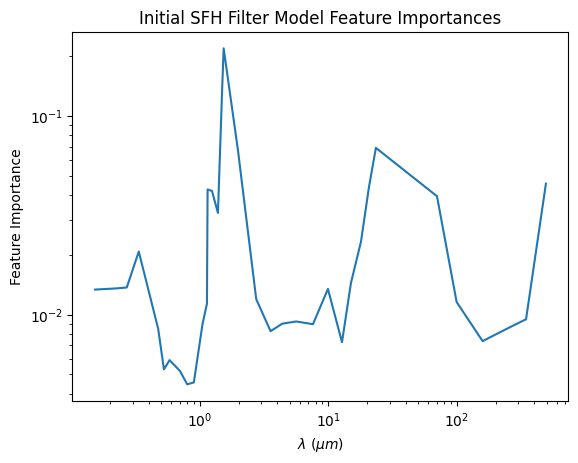

In [23]:
plt.plot(data_filt['wav_filt'],model.feature_importances_)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\lambda$ ($\\mu m$)')
plt.ylabel('Feature Importance')
plt.title('Initial SFH Filter Model Feature Importances')
plt.show()
plt.close()

In [ ]:
sns.kdeplot(np.ravel(guess_sfh-test_y))
plt.xlabel('$\\log{(SFR_{pred}+1)/(SFR_{true}+1)}$')
plt.axvline(np.quantile(guess_sfh-test_y,0.84),color = 'red',alpha = 0.5, linestyle = '--')
plt.axvline(np.quantile(guess_sfh-test_y,0.16), color = 'red',alpha = 0.5,linestyle = '--')
plt.show()
plt.close()

In [25]:
data35 = np.load(paths[user]+'filter_35.npz')
data35_filt = data35['filters']

data35_cf = np.load(paths[user]+'filter_35_cf.npz')
data35_cf_filt = data35_cf['filters']

data59 = np.load(paths[user]+'filter_59.npz')
data59_filt = data59['filters']

data59_cf = np.load(paths[user]+'filter_59_cf.npz')
data59_cf_filt = data59_cf['filters']


In [26]:
for key in data35.keys():
  print(key)

wav_filt
filters
gal_label


In [27]:
data35_out = []
data35_cf_out = []
data_59_out = []
data59_cf_out = []

In [28]:
snap35_pred = model.predict(data35_filt)
snap35_cf_pred = model.predict(data35_cf_filt)
snap59_pred = model.predict(data59_filt)
snap59_cf_pred = model.predict(data59_cf_filt)
np.shape(snap35_pred)

(37, 55)

In [34]:
# recreate bins
t_H = tH*10**-6
tbinmax = (t_H * 0.8) #* 1e9 #earliest time bin goes from age = 0 to age = 2.8 Gyr
# lim1, lim2 = 8.0-6,8.477-6#7.47, 8.0 #most recent time bins at 100 Myr and 300 Myr ago
# agelims = [0,lim1]
# agelims += np.linspace(lim2,np.log10(tbinmax),10-2).tolist()
# agelims += [np.log10(t_H)]#*1e9)]
# agebins = np.array([agelims[:-1], agelims[1:]])

# binsl =(t_H-10**np.array(agelims))[::-1]
binsl = np.arange(0, t_H, 250)
msums, binsedge, binnumber = scipy.stats.binned_statistic(np.linspace(1,100), np.linspace(1,100),
                                                              statistic='sum',bins=binsl)
binsplot = np.repeat(binsedge,2)[1:-1]
wav = data_filt['wav_filt']

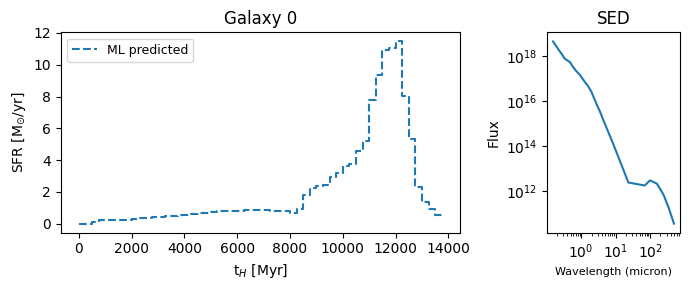

10.474180322786669


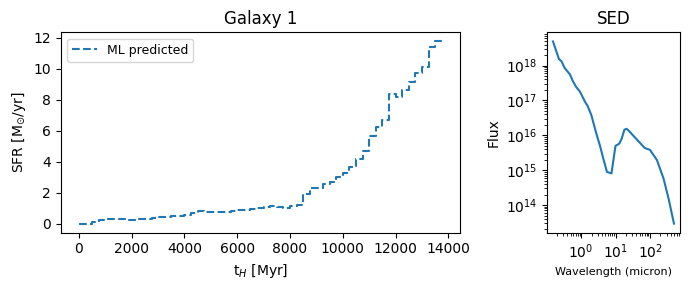

10.565141896354168


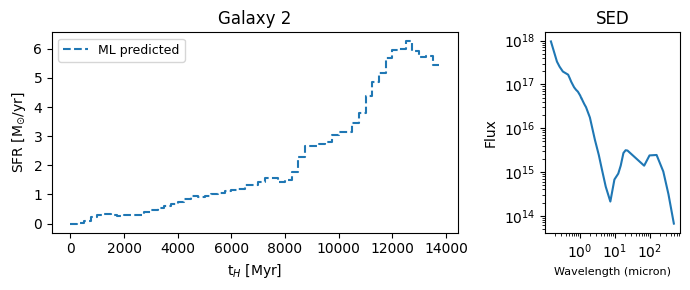

10.468651708902822


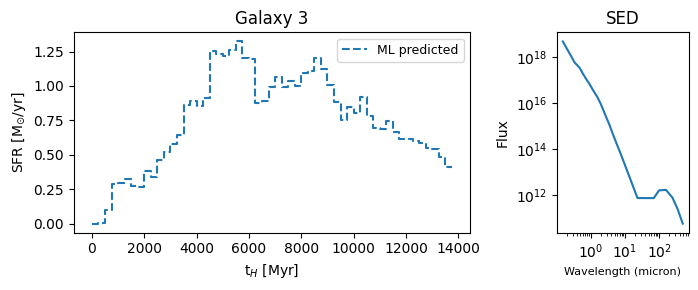

10.013578668123849


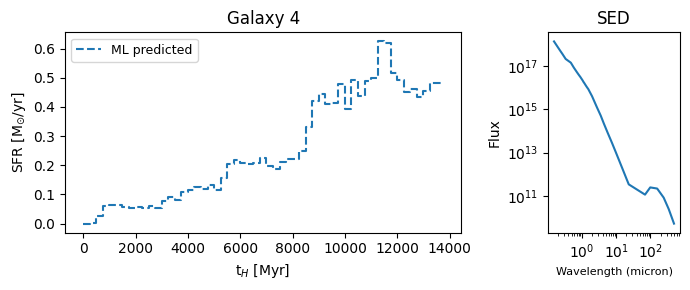

9.545589374894712


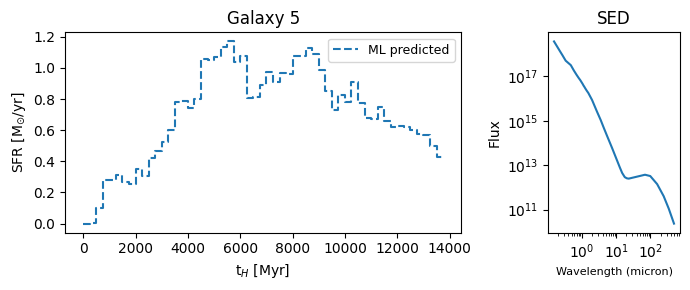

9.986068446023655


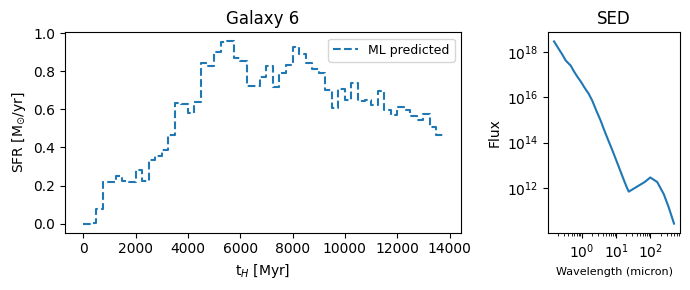

9.91156168733283


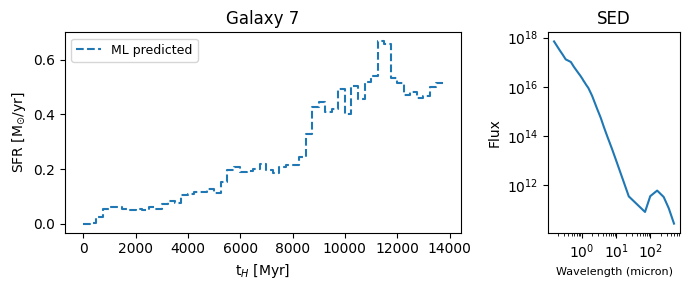

9.551995936553453


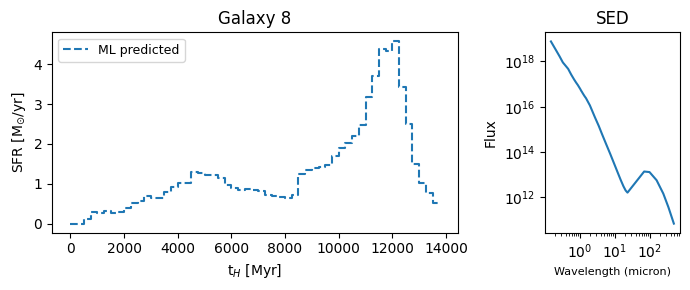

10.247340626901025


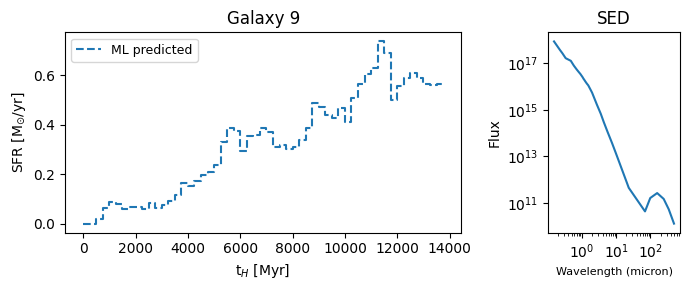

9.649292230810774


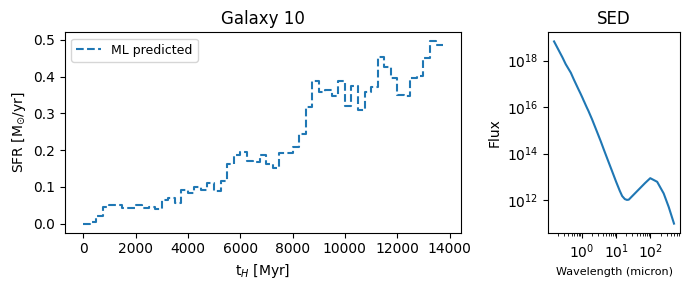

9.463163064859634


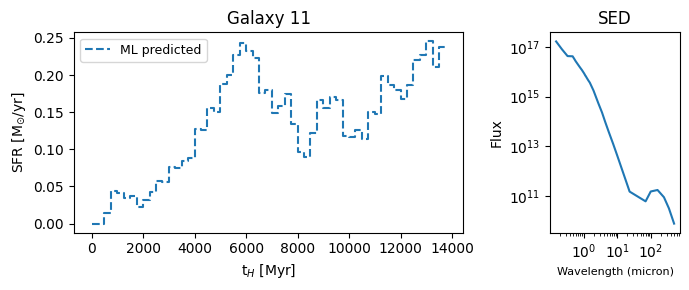

9.264515842507123


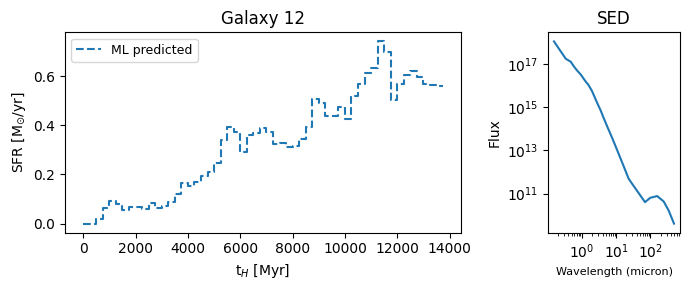

9.65584890070324


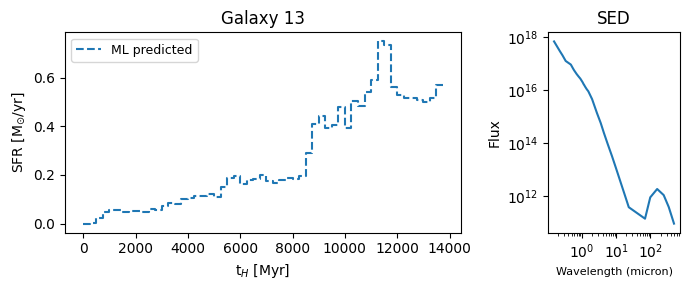

9.55541503649222


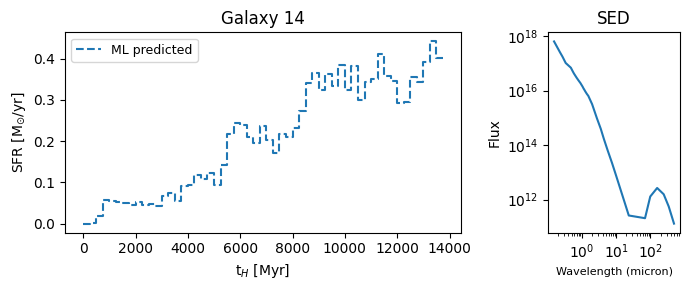

9.459320769179364


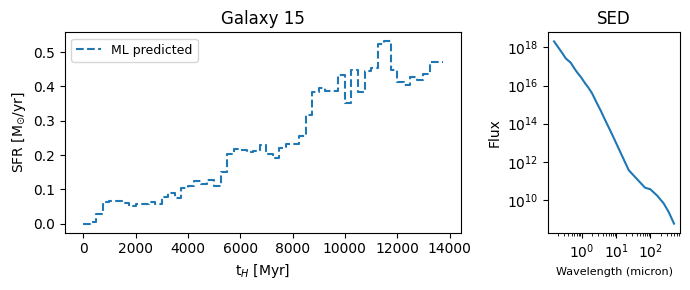

9.51877627313682


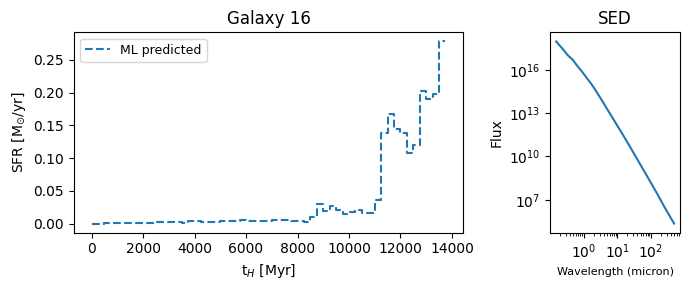

8.70103913695544


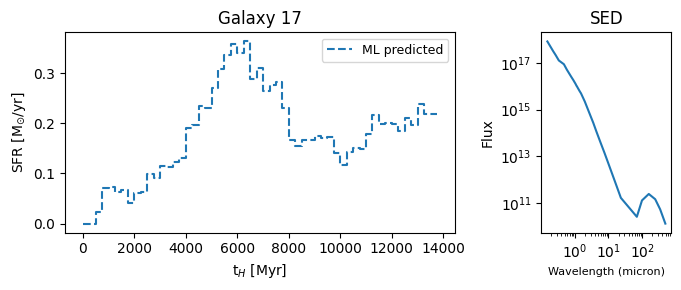

9.386979546099159


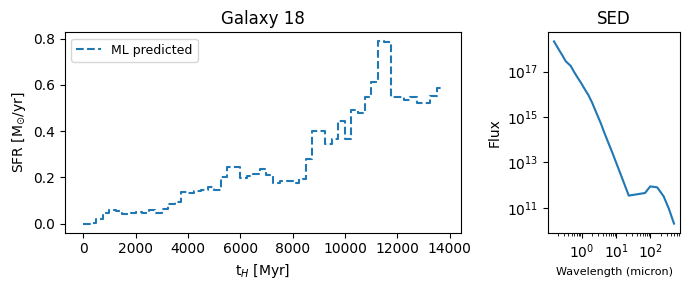

9.570945592524968


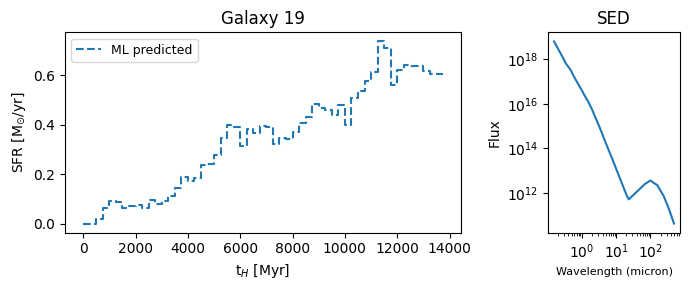

9.673732073818144


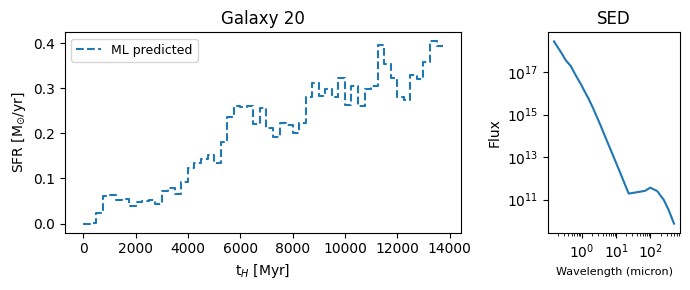

9.44212631825604


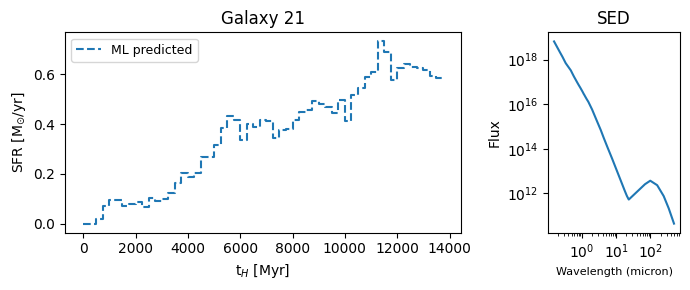

9.689040991806195


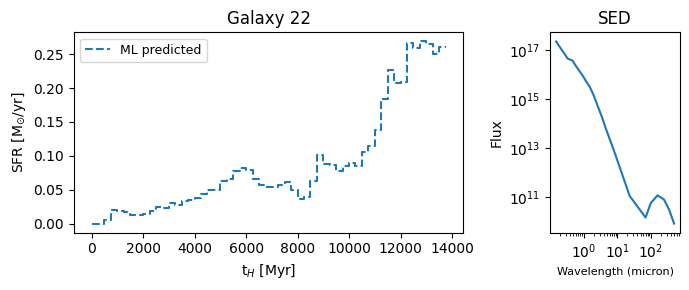

9.0746031895647


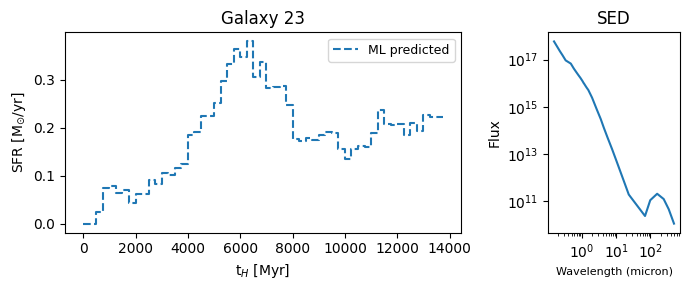

9.39724399730882


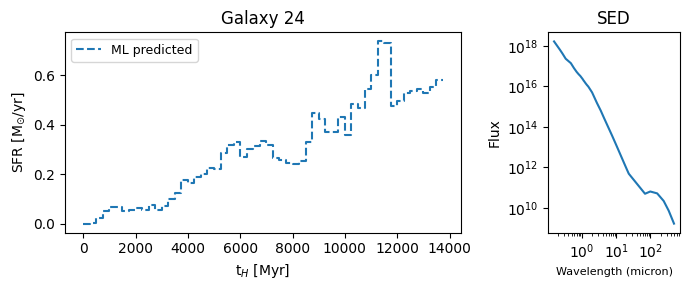

9.610185939500374


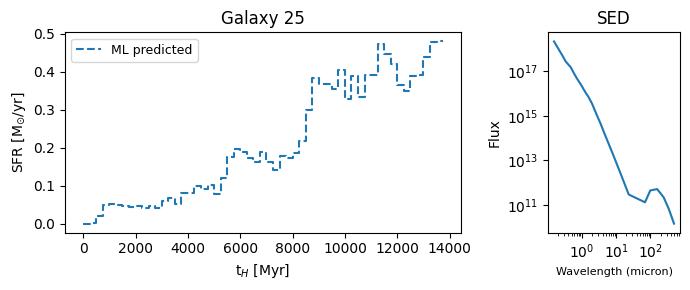

9.465181265810864


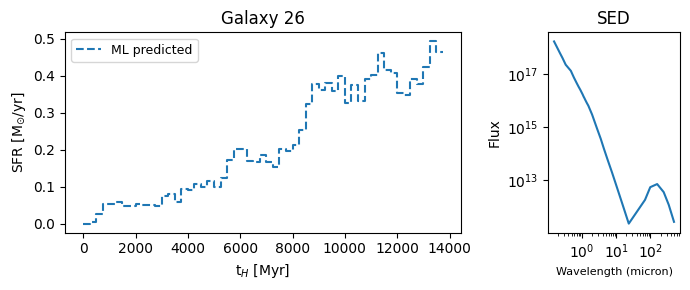

9.47265548100393


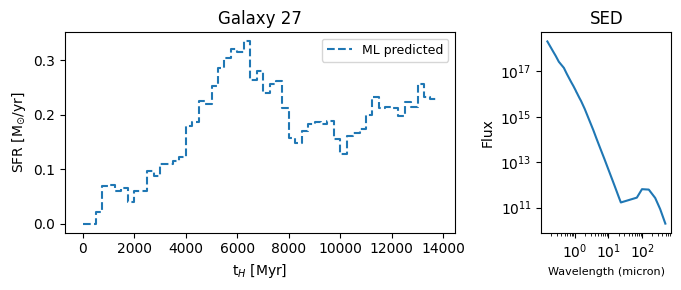

9.38204940562514


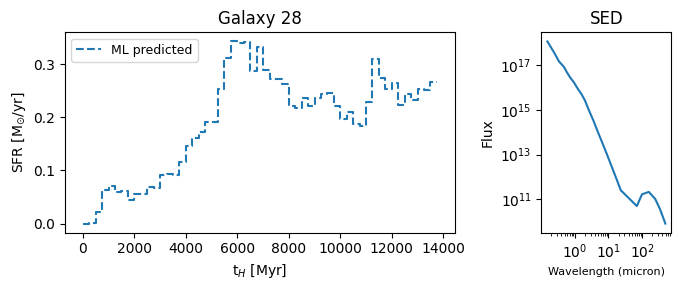

9.421515518331619


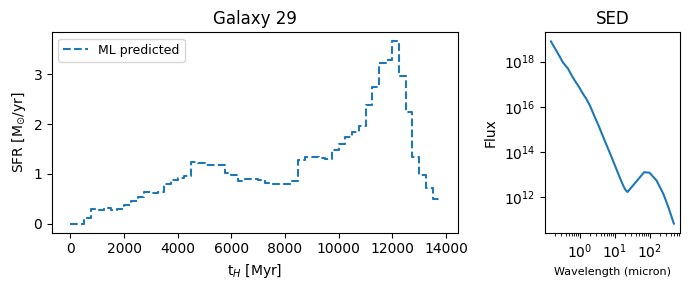

10.198540943884696


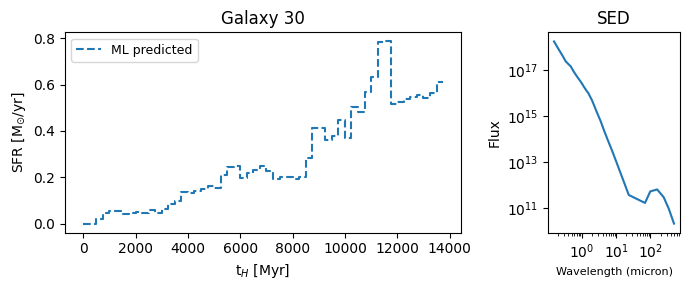

9.579906012943079


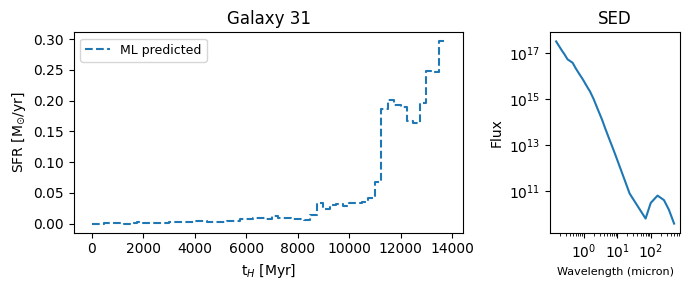

8.81301269942998


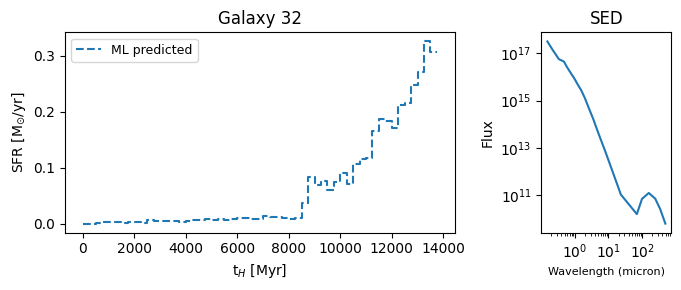

8.928479218091324


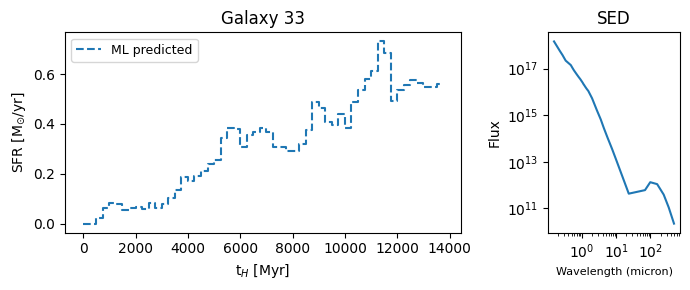

9.643431535572223


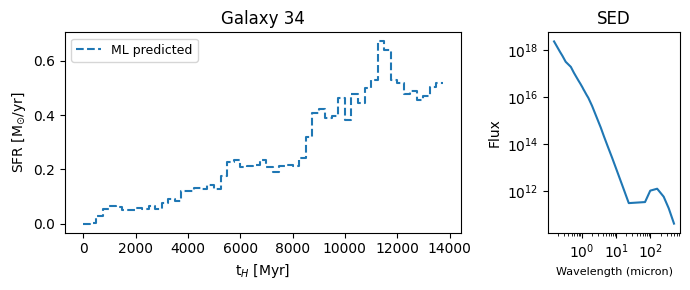

9.555238708365735


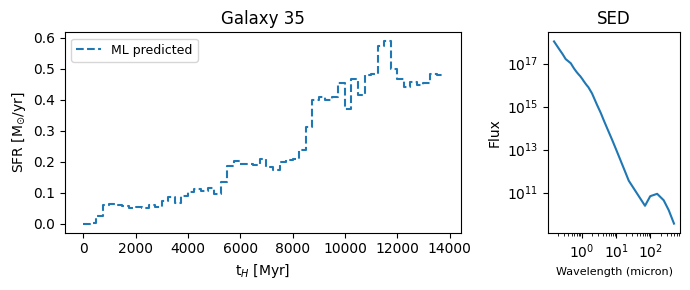

9.524475115774157


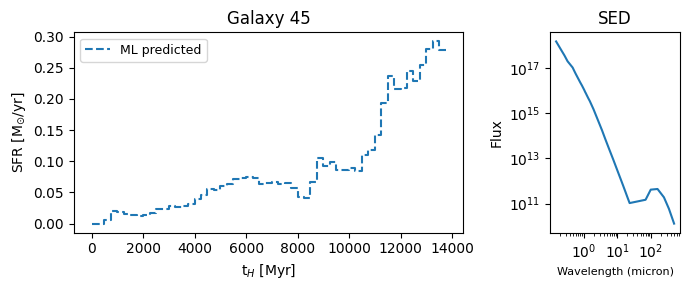

9.086344638512433


In [35]:

for idx in range(len(snap35_pred)):
#for idx in perm[:50]:
    plt.figure(figsize=(7,3))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

    fil = data35_filt[idx]
    pred = snap35_pred[idx]
    ax = plt.subplot(gs[0])
    #pred = model.predict(filters[idx].reshape(-1, 1))
    y = arr_double(pred)
    plt.plot(binsplot,10**y-1,label = f'ML predicted', ls='--')
    plt.ylabel('SFR [M$_{\odot}/$yr]')
    plt.xlabel('t$_H$ [Myr]')
    plt.title(f"Galaxy {data35['gal_label'][idx]}")
    plt.legend(fontsize=9)
    ax = plt.subplot(gs[1])
    plt.loglog(wav, fil)
    plt.xlabel('Wavelength (micron)', size=8)
    plt.ylabel('Flux')
    plt.title('SED')
    plt.tight_layout()
    plt.show()
    plt.close()
    print(np.log10(np.trapz(10**y-1,binsplot))+6)

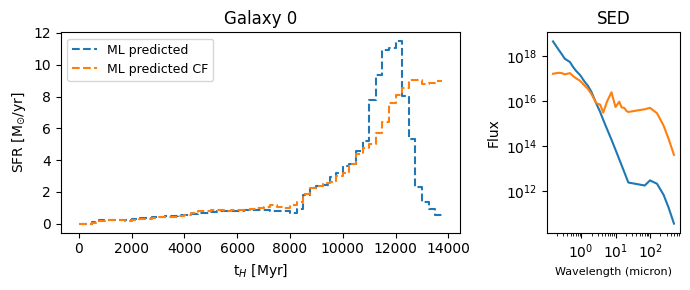

10.474180322786669


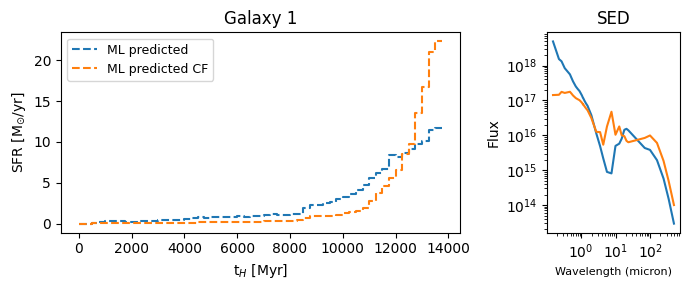

10.565141896354168


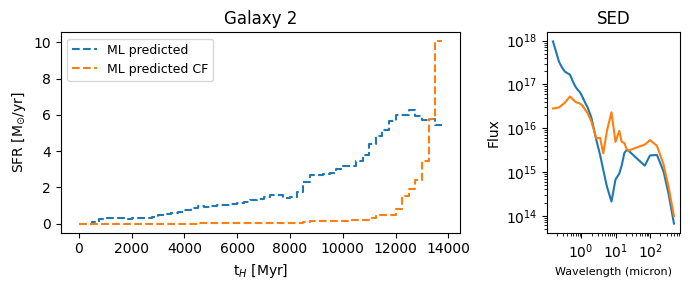

10.468651708902822


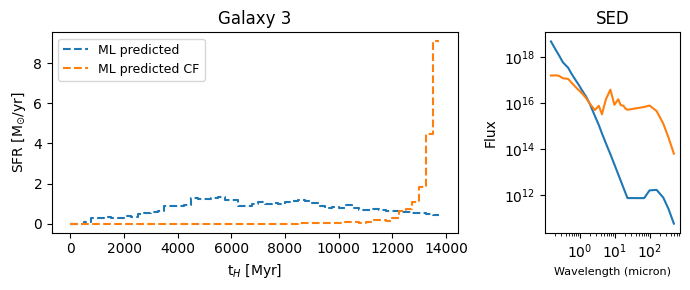

10.013578668123849


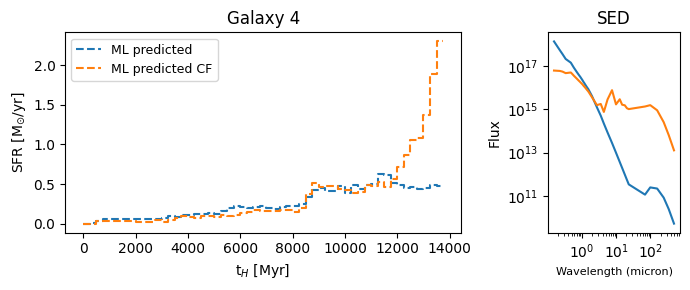

9.545589374894712


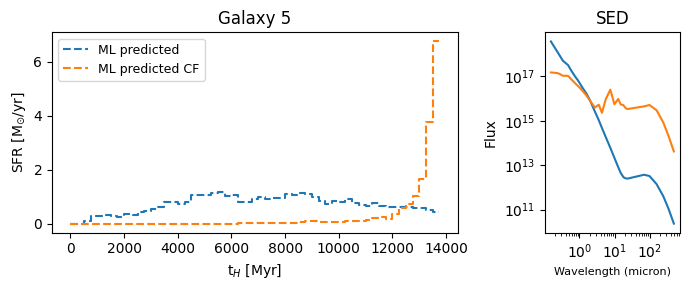

9.986068446023655


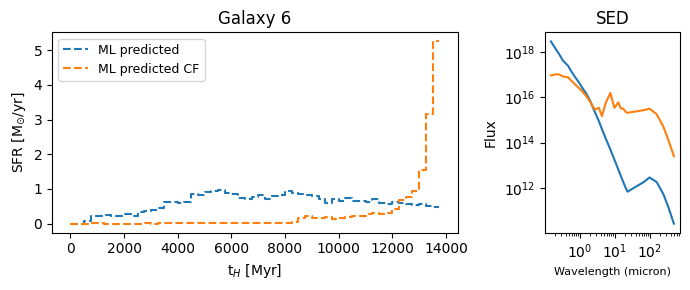

9.91156168733283


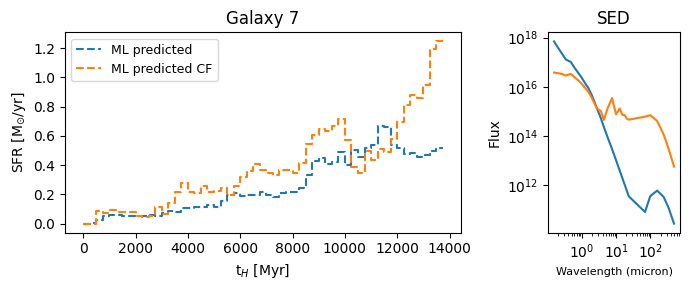

9.551995936553453


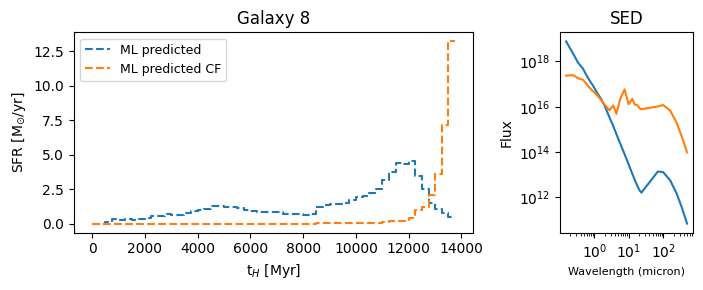

10.247340626901025


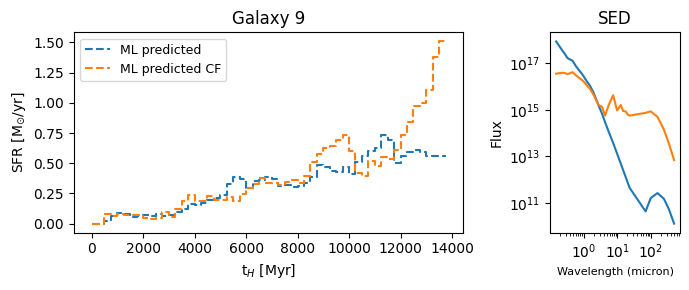

9.649292230810774


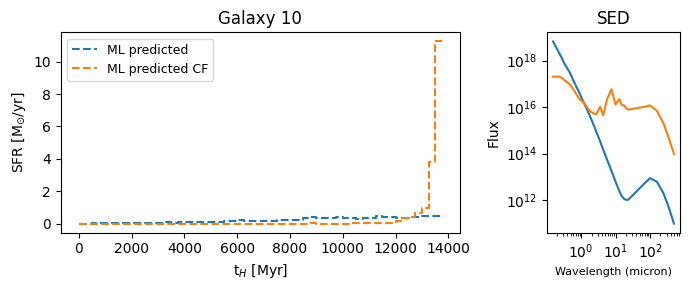

9.463163064859634


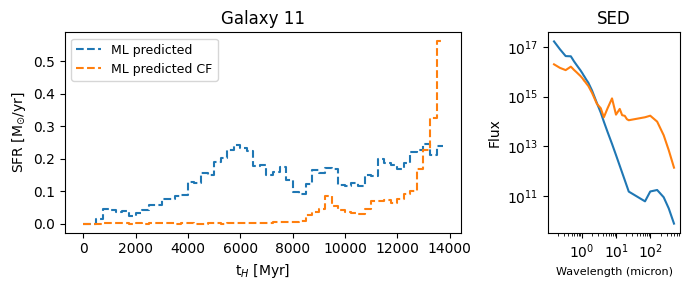

9.264515842507123


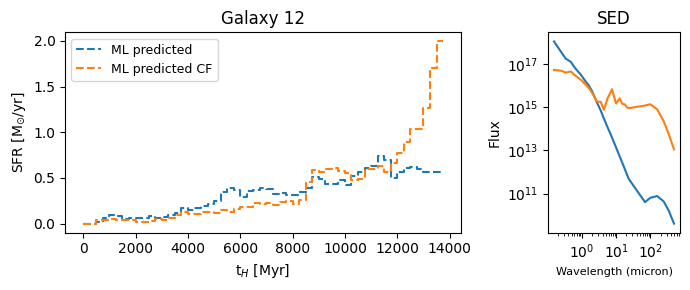

9.65584890070324


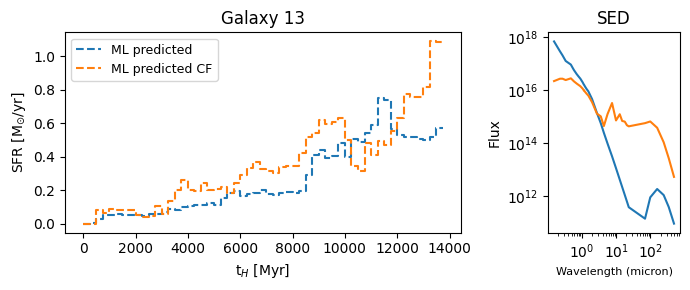

9.55541503649222


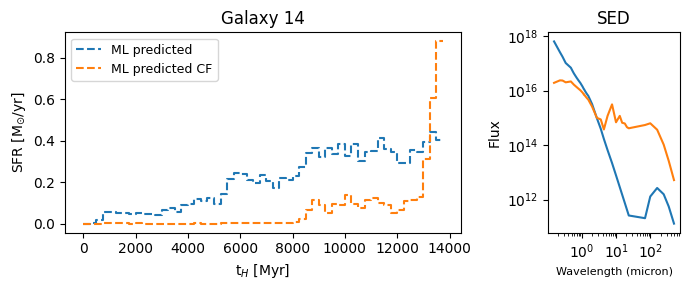

9.459320769179364


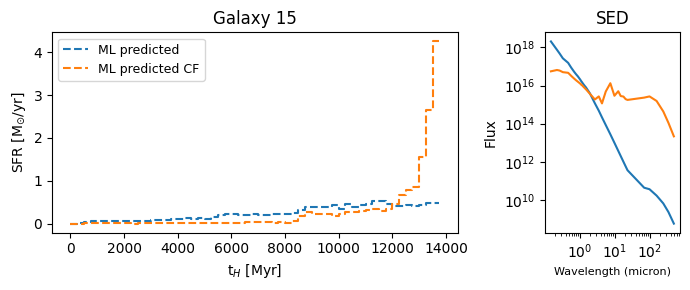

9.51877627313682


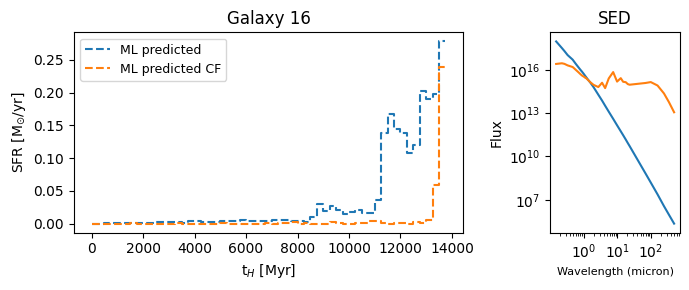

8.70103913695544


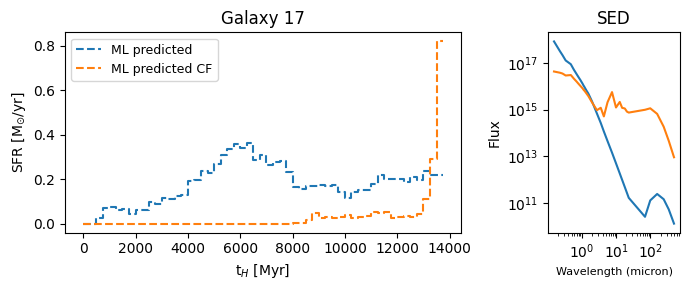

9.386979546099159


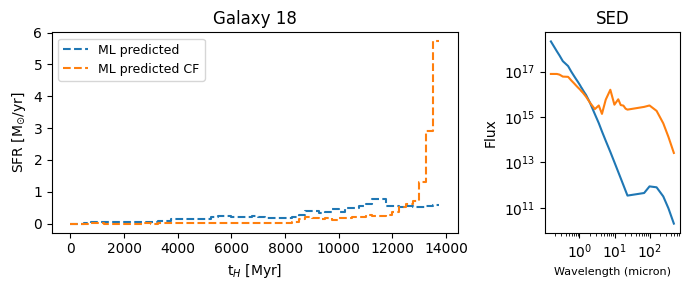

9.570945592524968


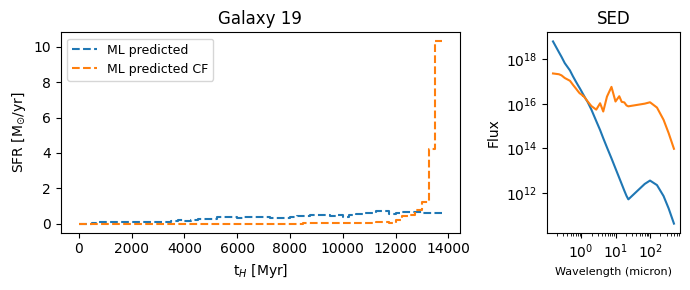

9.673732073818144


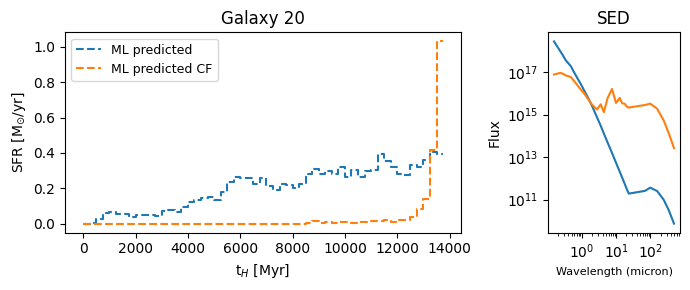

9.44212631825604


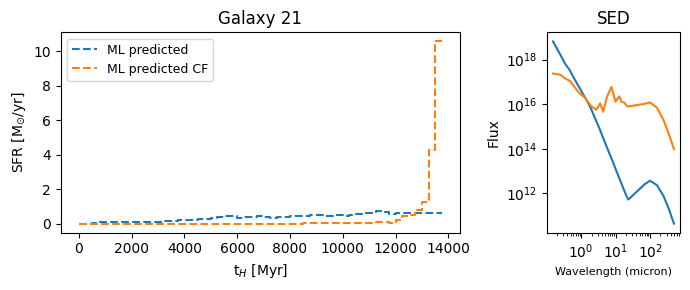

9.689040991806195


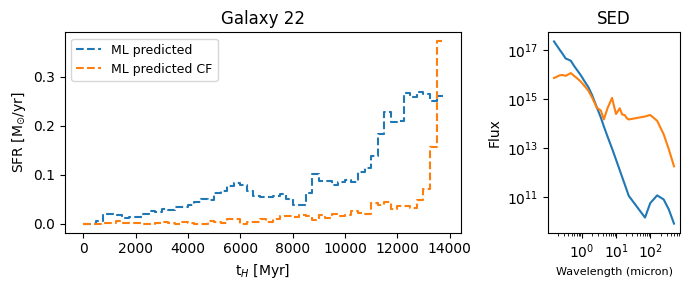

9.0746031895647


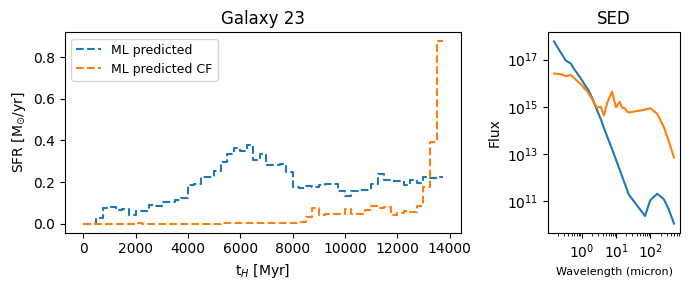

9.39724399730882


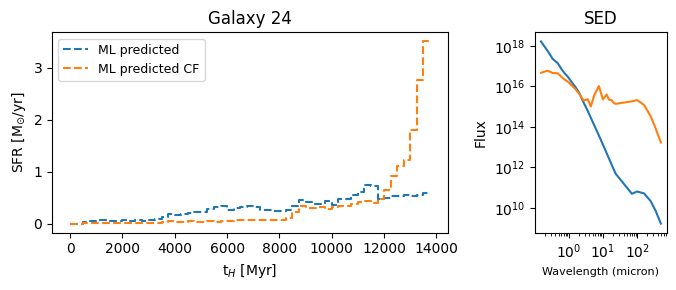

9.610185939500374


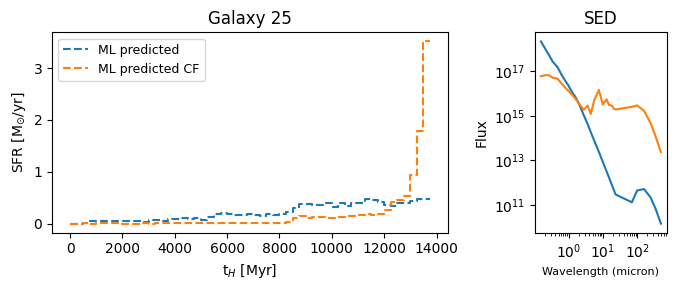

9.465181265810864


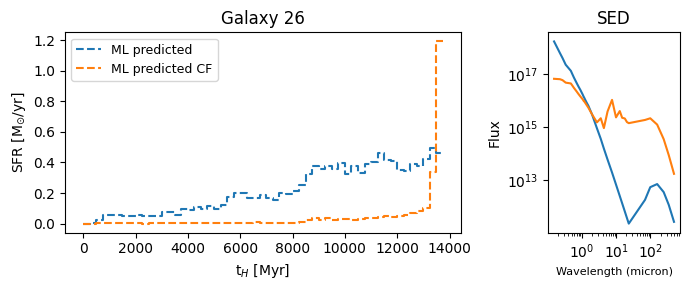

9.47265548100393


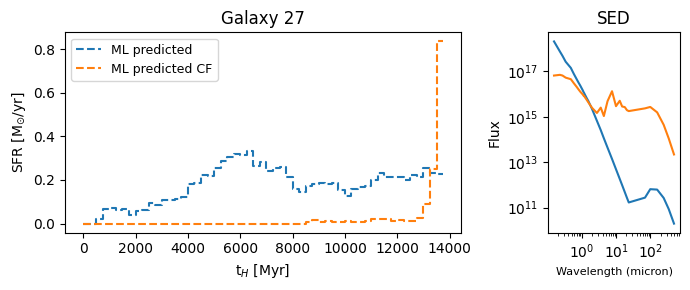

9.38204940562514


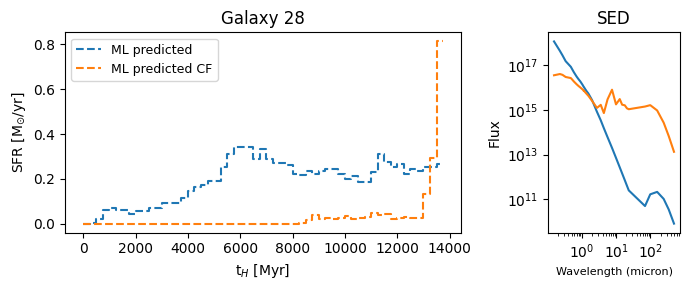

9.421515518331619


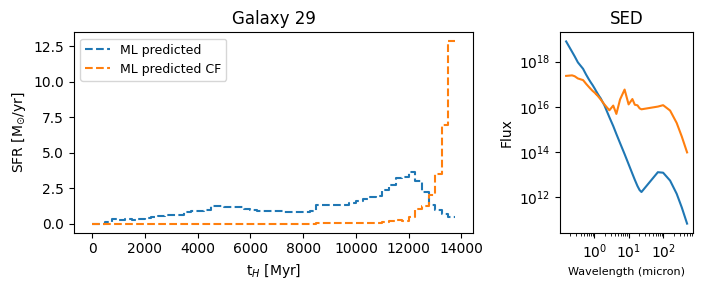

10.198540943884696


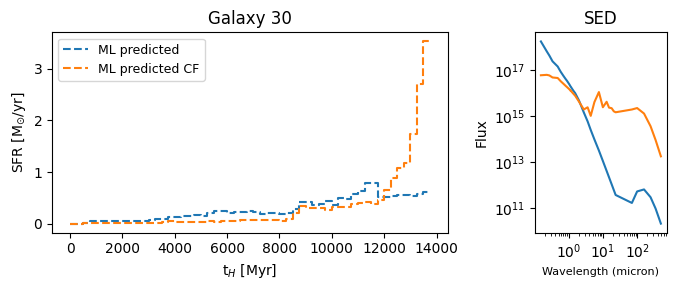

9.579906012943079


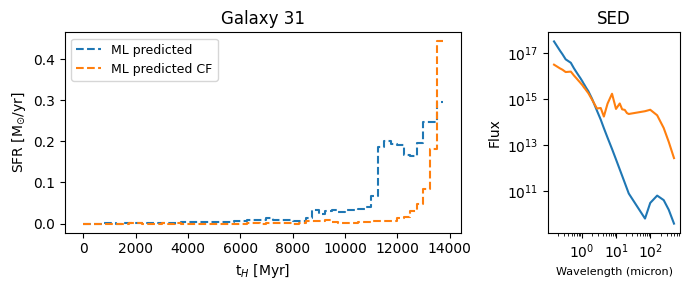

8.81301269942998


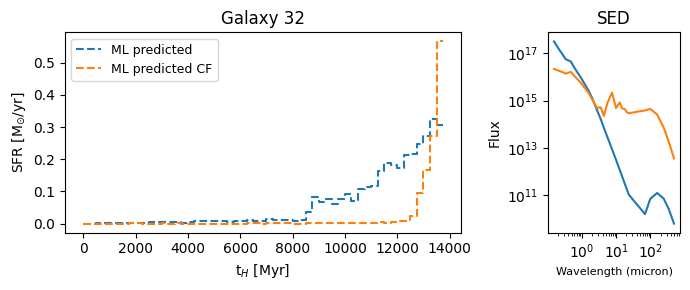

8.928479218091324


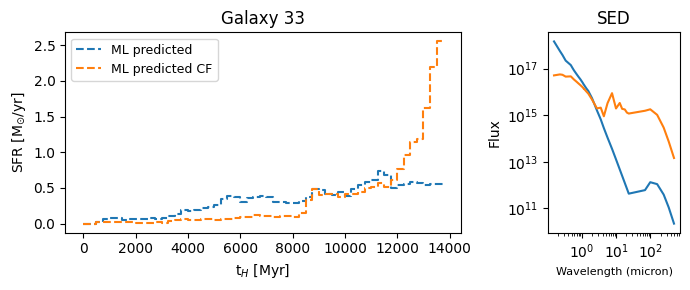

9.643431535572223


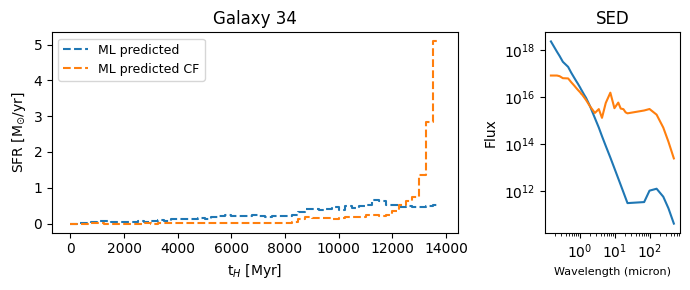

9.555238708365735


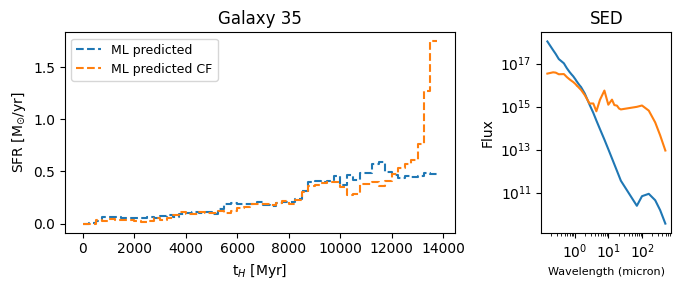

9.524475115774157


In [36]:
for idx in range(len(snap35_cf_pred)):
#for idx in perm[:50]:
    plt.figure(figsize=(7,3))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    fil = data35_filt[idx]
    pred = snap35_pred[idx]

    fil_cf = data35_cf_filt[idx]
    pred_cf = snap35_cf_pred[idx]

    ax = plt.subplot(gs[0])
    #pred = model.predict(filters[idx].reshape(-1, 1))
    y = arr_double(pred)
    y2 = arr_double(pred_cf)

    plt.plot(binsplot,10**y-1,label = f'ML predicted', ls='--')
    plt.plot(binsplot,10**y2-1,label = f'ML predicted CF', ls='--')
    plt.ylabel('SFR [M$_{\odot}/$yr]')
    plt.xlabel('t$_H$ [Myr]')
    plt.title(f"Galaxy {data35['gal_label'][idx]}")
    plt.legend(fontsize=9)
    ax = plt.subplot(gs[1])
    plt.loglog(wav, fil)
    plt.loglog(wav, fil_cf)
    plt.xlabel('Wavelength (micron)', size=8)
    plt.ylabel('Flux')
    plt.title('SED')
    plt.tight_layout()
    plt.show()
    plt.close()
    print(np.log10(np.trapz(10**y-1,binsplot))+6)

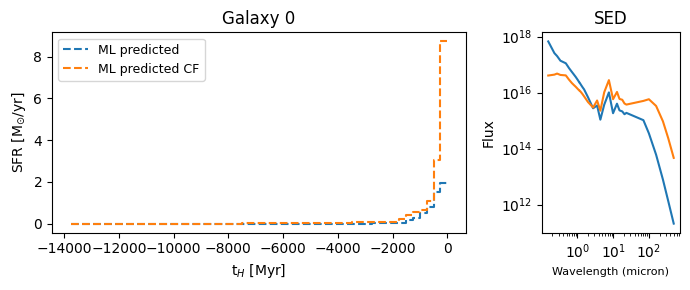

9.122269299663


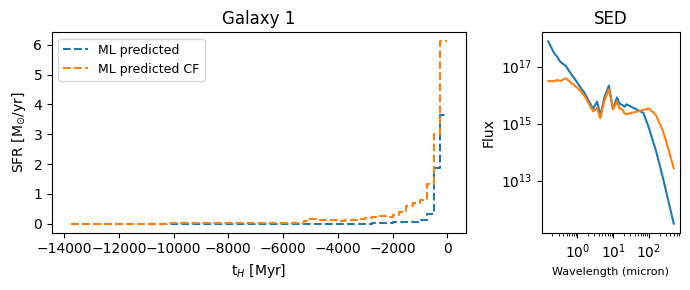

9.193793304609969


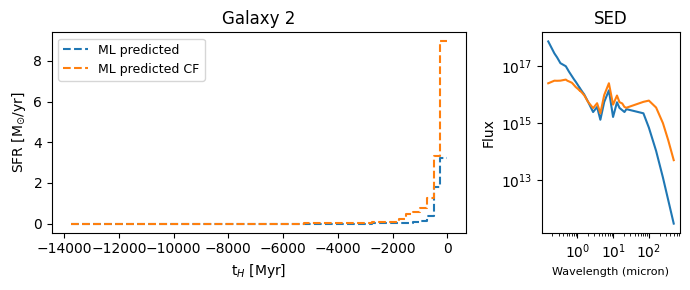

9.160892075480092


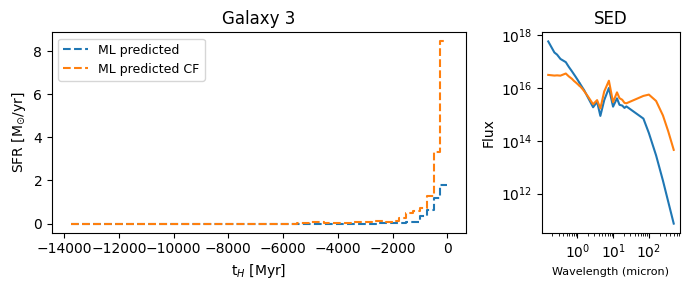

9.019920507412808


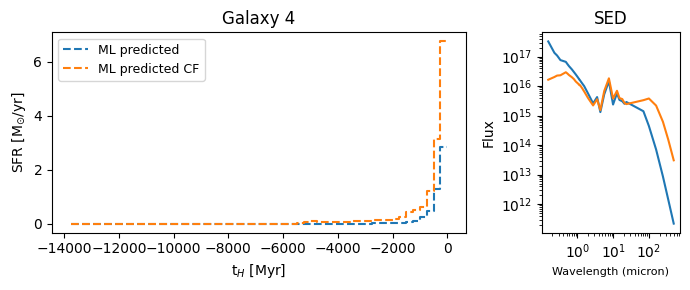

9.103402021622781


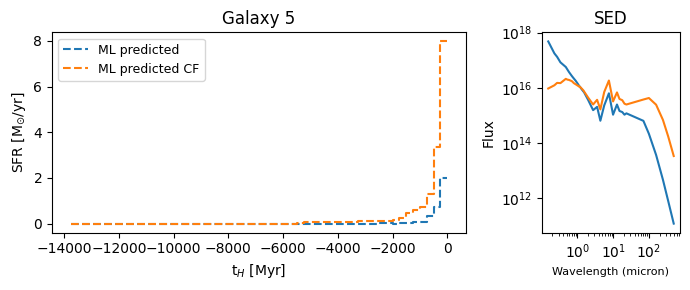

8.913622473076359


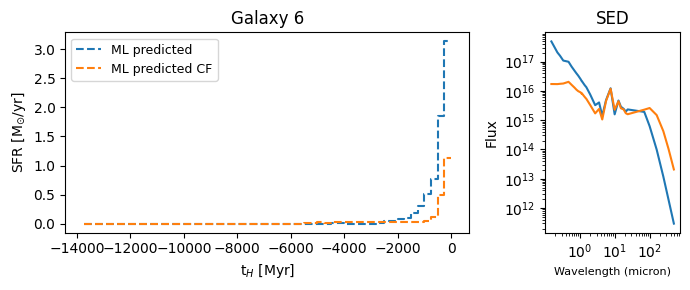

9.245057459225587


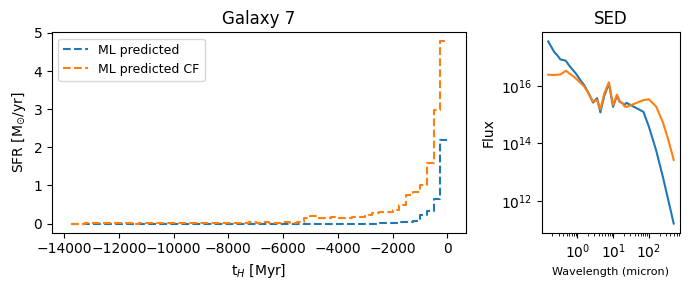

8.94781653345244


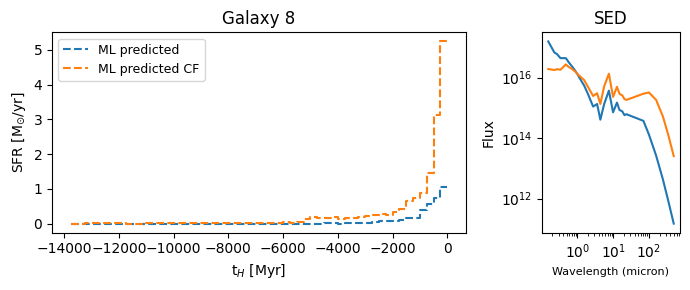

8.938138496704237


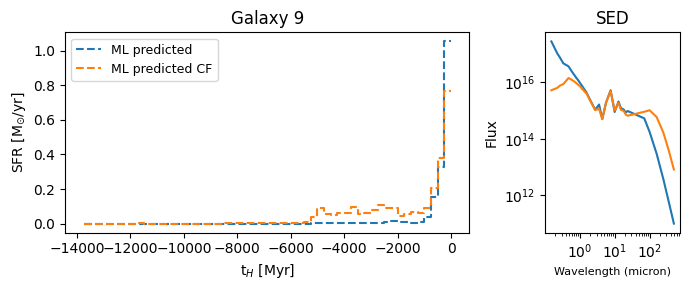

8.614657820243512


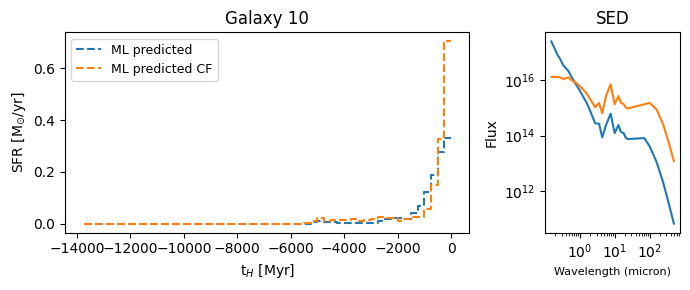

8.459458804913433


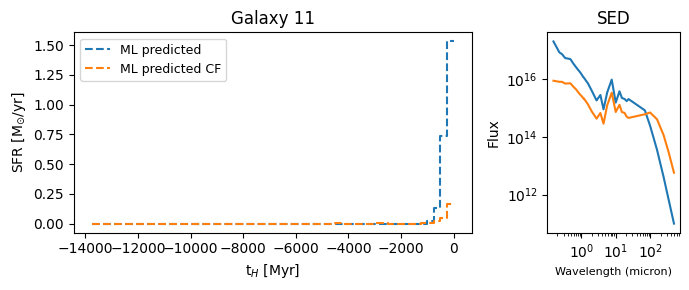

8.782904049515556


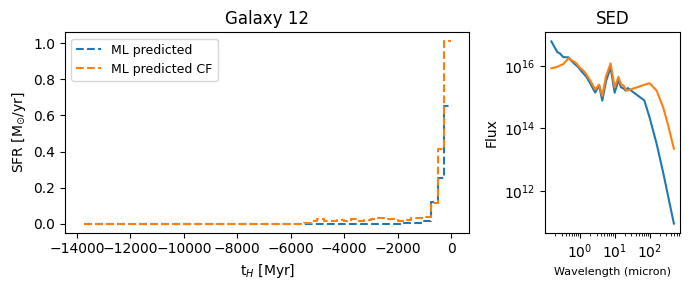

8.421538120883412


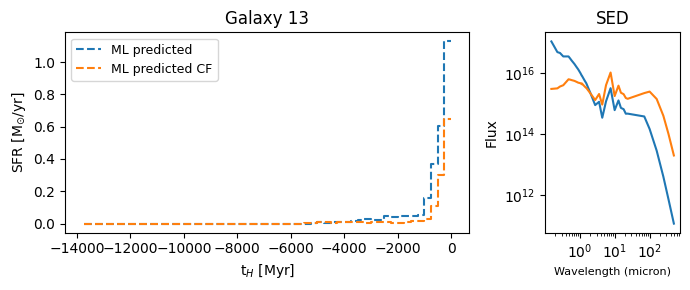

8.83069450857894


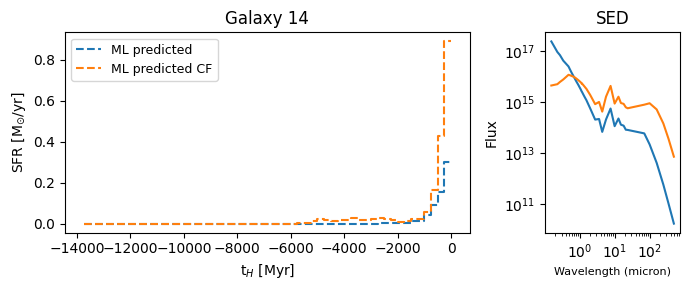

8.195947238215613


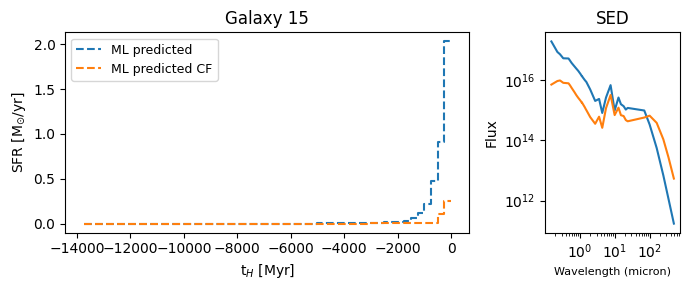

8.993597513186941


KeyboardInterrupt: ignored

In [41]:
for idx in range(len(snap59_pred)):
#for idx in perm[:50]:
    plt.figure(figsize=(7,3))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    fil = data59_filt[idx]
    pred = snap59_pred[idx]

    fil_cf = data59_cf_filt[idx]
    pred_cf = snap59_cf_pred[idx]

    ax = plt.subplot(gs[0])
    #pred = model.predict(filters[idx].reshape(-1, 1))
    y = arr_double(pred)
    y2 = arr_double(pred_cf)

    plt.plot(binsplot-np.max(binsplot),10**y-1,label = f'ML predicted', ls='--')
    plt.plot(binsplot-np.max(binsplot),10**y2-1,label = f'ML predicted CF', ls='--')
    plt.ylabel('SFR [M$_{\odot}/$yr]')
    plt.xlabel('t$_H$ [Myr]')
    plt.title(f"Galaxy {data35['gal_label'][idx]}")
    plt.legend(fontsize=9)
    ax = plt.subplot(gs[1])
    plt.loglog(wav, fil)
    plt.loglog(wav, fil_cf)
    plt.xlabel('Wavelength (micron)', size=8)
    plt.ylabel('Flux')
    plt.title('SED')
    plt.tight_layout()
    plt.show()
    plt.close()
    print(np.log10(np.trapz(10**y-1,binsplot))+6)

In [42]:
lookback = binsplot-np.max(binsplot)
np.savez('snap35_sfh_pred.npz',sfh_t = lookback, sfh_val = snap35_pred, gal_label = data35['gal_label'])
np.savez('snap35_cf_sfh_pred.npz',sfh_t = lookback, sfh_val = snap35_cf_pred, gal_label = data35_cf['gal_label'])
np.savez('snap59_sfh_pred.npz',sfh_t = lookback, sfh_val = snap59_pred, gal_label = data59['gal_label'])
np.savez('snap59_cf_sfh_pred.npz',sfh_t = lookback, sfh_val = snap59_cf_pred, gal_label = data59_cf['gal_label'])